In [2]:
import numpy as np
import pandas as pd
import astroquery
from astroquery.vizier import Vizier
from astroquery.gaia import Gaia
import astropy                   
import astropy.units as u
from astropy.coordinates import SkyCoord
import os
import matplotlib.pyplot as plot
from astroquery.gaia import Gaia
from astropy.table import Table
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
#Quering eROSITA data
file = os.chdir("/home/abhi/Desktop/eROSITA/")
data = pd.read_csv("CV_test_2300")
source_id = data["id"].dropna().to_numpy()
RA = data["RA (deg)"].dropna().to_numpy()
DEC = data["DEC (deg)"].dropna().to_numpy()
idd = data["Unnamed: 1"].dropna().to_numpy()
RA

array([ 86.9515757 , 231.27860356,  58.54292811,  66.64026542,
        69.8749128 ,  75.7258555 ,  95.35297555,  99.22747575,
       100.78333856, 106.7040132 , 116.57129287, 118.13838319,
       135.47657783, 141.78439302, 144.48951805, 149.46100417,
       148.24917342, 159.94578384, 187.80023177, 189.56745434,
       193.10033648, 196.42510903, 223.42055665, 252.48180863,
       259.8995265 , 280.21830823, 302.23285068, 306.91178969,
       309.79821006,  20.15976243,  26.55278361,  27.96610824,
        39.03034438,  66.17150872,  79.84542163,  79.68422304,
        82.76591264,  86.75753949,  87.03096343,  95.73611354,
        96.69999603, 101.98468361, 108.12783159, 118.17692866,
       118.54949955, 119.56287161, 122.73615385, 128.14528694,
       154.98584307, 156.87682122, 162.82384305, 164.49468841,
       198.1921585 , 210.96058083, 230.28605979, 254.13495328,
       264.01804179, 274.75157577, 358.25409051])

In [4]:
#Getting the corresponding GAIA sources
coord_eROSITA = SkyCoord(ra = RA, dec = DEC, unit=(u.deg, u.deg))
len(coord_eROSITA)

#Getting the GAIA sources ID 
Vizier.VIZIER_SERVER = "vizier.cds.unistra.fr" 
Vizier.ROW_LIMIT = 1  
gaia_catalog = "I/345/gaia2"  
matched_gaia_ids = []

result = Vizier.query_region(coord_eROSITA, radius=3*u.arcsec, catalog=gaia_catalog)
result

TableList with 1 tables:
	'0:I/345/gaia2' with 33 column(s) and 59 row(s) 

In [5]:
source_d = result[0]["Source"]
source_id = []
for i in source_d:
    source_id.append(i)
    
type(source_id)

list

In [6]:
source_i = result[0][16]
source_i

_q,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E(BP-RP),Rad,Lum
,deg,mas,deg,mas,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,mag,mag,,,mag,mag,,,mag,mag,mag,km / s,km / s,K,mag,mag,solRad,solLum
int32,float64,float64,float64,float64,int64,float64,float32,float64,float32,float64,float32,uint8,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float32,float32,float32,float64
17,148.24917342258,0.0589,-31.04628102715,0.0554,5463274408550748160,3.6456,0.0809,17.491,0.138,-16.966,0.140,0,2392,71.52,17.2414,0.0325,1849,173.5,17.1839,0.1019,1527,116.9,16.8024,0.0832,0.3815,--,--,--,--,--,--,--


In [7]:
source_id = np.column_stack((source_id,idd))
source_id

array([[3443331944709730176,                2166],
       [4413778946245759360,                2167],
       [5107845936158224768,                2183],
       [4896134903510805888,                2188],
       [3201141899983079296,                2192],
       [4876960142276784896,                2198],
       [3001108264938556800,                2219],
       [3119646304291839872,                2221],
       [5575754203257115264,                2222],
       [3116059834803771904,                2225],
       [5718979169177809920,                2232],
       [5531498108631141760,                2233],
       [5323740434455153536,                2244],
       [5219536629414274304,                2248],
       [5684987011280279808,                2251],
       [5418746249213961472,                2252],
       [5463274408550748160,                2253],
       [3776795812613678976,                2259],
       [6145666951501477376,                2274],
       [6153373329716524800,   

{}
Skipping source 3443331944709730176: no spectrum available
{}
Skipping source 4413778946245759360: no spectrum available
{}
Skipping source 5107845936158224768: no spectrum available
{'XP_SAMPLED-Gaia DR3 4896134903510805888.fits': [<Table length=343>
wavelength      flux       flux_error  
    nm      W / (nm m2)   W / (nm m2)  
 float64      float32       float32    
---------- ------------- --------------
     336.0  4.661263e-17  1.2005144e-17
     338.0 3.9843222e-17   9.463278e-18
     340.0 3.6639072e-17   8.224627e-18
     342.0 3.8507646e-17  7.6139535e-18
     344.0 4.1077303e-17   7.538815e-18
     346.0 3.9969063e-17   7.816227e-18
     348.0 3.7220252e-17   8.562313e-18
     350.0 3.7004467e-17   9.366892e-18
     352.0 4.0091747e-17 1.06544875e-17
       ...           ...            ...
    1002.0 2.6661191e-17   4.393421e-18
    1004.0 2.5994133e-17  4.3518386e-18
    1006.0 2.5375251e-17   4.699238e-18
    1008.0 2.4108108e-17  5.3717365e-18
    1010.0 2.3073618e-17 

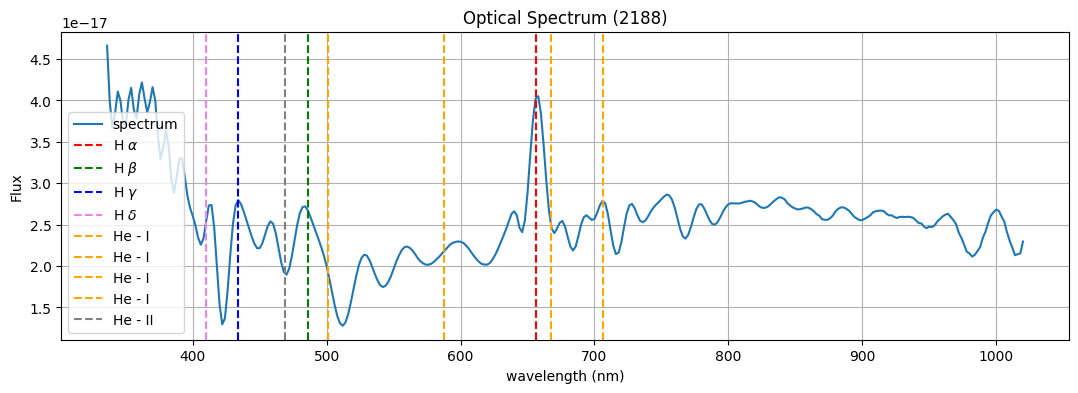

{'XP_SAMPLED-Gaia DR3 3201141899983079296.fits': [<Table length=343>
wavelength      flux       flux_error  
    nm      W / (nm m2)   W / (nm m2)  
 float64      float32       float32    
---------- ------------- --------------
     336.0 7.4451026e-17   3.537831e-17
     338.0 8.2004264e-17  3.1322206e-17
     340.0  7.570961e-17  2.6086682e-17
     342.0  7.386998e-17  2.6391422e-17
     344.0 8.6727915e-17  2.6185987e-17
     346.0  9.824695e-17  2.8819568e-17
     348.0 9.6475564e-17   3.137744e-17
     350.0 9.5382435e-17   3.650675e-17
     352.0 1.1499614e-16   4.116894e-17
       ...           ...            ...
    1002.0 2.5541665e-17  1.1154958e-17
    1004.0  2.850429e-17  1.0618497e-17
    1006.0  3.244046e-17 1.11563834e-17
    1008.0  3.601087e-17  1.2909356e-17
    1010.0 3.9738518e-17  1.5799573e-17
    1012.0   4.29051e-17   1.891411e-17
    1014.0  4.398497e-17  2.0983691e-17
    1016.0 4.4475844e-17    2.23415e-17
    1018.0  4.148523e-17  2.1532926e-17
    1020.0 

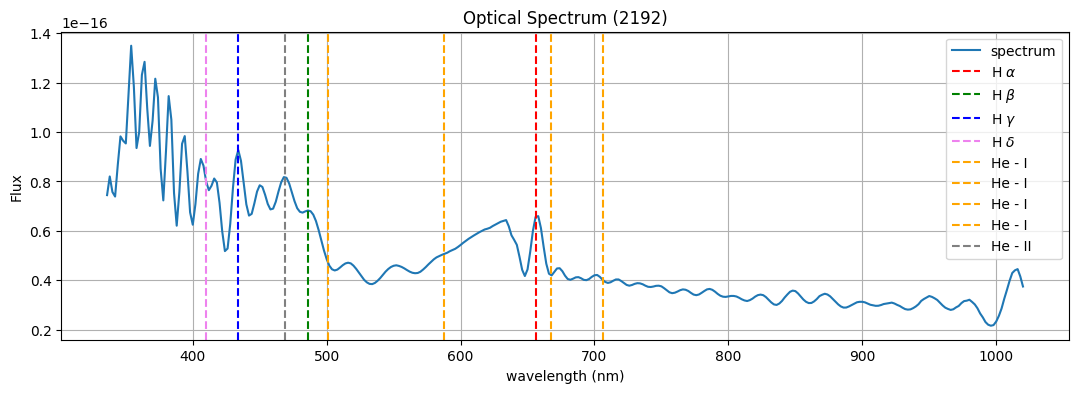

{'XP_SAMPLED-Gaia DR3 4876960142276784896.fits': [<Table length=343>
wavelength      flux        flux_error 
    nm      W / (nm m2)    W / (nm m2) 
 float64      float32        float32   
---------- -------------- -------------
     336.0  2.7271566e-17 3.3748566e-18
     338.0  3.0532408e-17 2.5191848e-18
     340.0  3.0843583e-17  2.079891e-18
     342.0  2.7691372e-17 1.7744666e-18
     344.0  2.4057155e-17  1.666135e-18
     346.0  2.2479877e-17 1.6381564e-18
     348.0  2.3960492e-17 1.7121182e-18
     350.0  2.6731453e-17 1.8266034e-18
     352.0  2.8556005e-17 2.0118147e-18
       ...            ...           ...
    1002.0  1.1790716e-17   9.16243e-19
    1004.0  1.1674911e-17  9.286255e-19
    1006.0  1.1716008e-17 1.0343619e-18
    1008.0  1.1558601e-17 1.2060984e-18
    1010.0 1.15537924e-17 1.4349708e-18
    1012.0 1.16152826e-17  1.661246e-18
    1014.0 1.14763774e-17 1.7983517e-18
    1016.0  1.1651973e-17 1.8997867e-18
    1018.0  1.1455387e-17 1.8697049e-18
    1020.0 

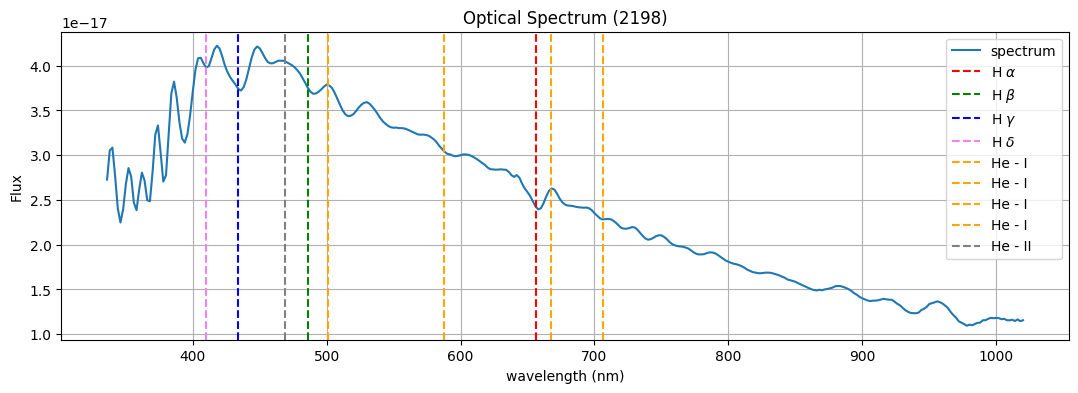

{}
Skipping source 3001108264938556800: no spectrum available
{}
Skipping source 3119646304291839872: no spectrum available
{}
Skipping source 5575754203257115264: no spectrum available
{}
Skipping source 3116059834803771904: no spectrum available
{'XP_SAMPLED-Gaia DR3 5718979169177809920.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0  4.873844e-17  8.929192e-18
     338.0 4.3618795e-17  7.289209e-18
     340.0  3.739321e-17 6.4021654e-18
     342.0 3.7243043e-17 6.0156652e-18
     344.0 4.1345478e-17  6.037979e-18
     346.0  4.184052e-17 6.3485475e-18
     348.0 3.7930972e-17  6.973006e-18
     350.0  3.652477e-17  7.715125e-18
     352.0  4.169827e-17  8.717427e-18
       ...           ...           ...
    1002.0 2.1306831e-17 3.7528022e-18
    1004.0  2.215209e-17  3.688719e-18
    1006.0 2.3574694e-17  4.045239e-18
    1008.0 2.4760886

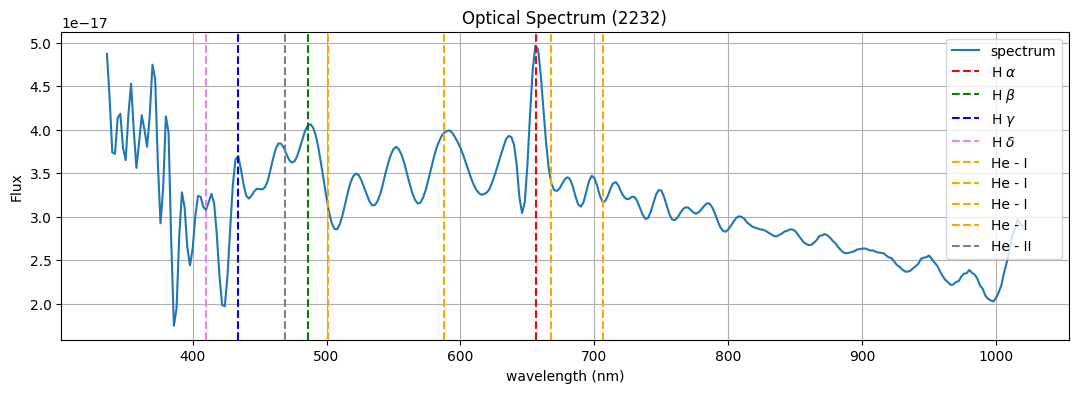

{}
Skipping source 5531498108631141760: no spectrum available
{}
Skipping source 5323740434455153536: no spectrum available
{'XP_SAMPLED-Gaia DR3 5219536629414274304.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0  5.719238e-17 5.7111784e-18
     338.0  5.612076e-17   4.24559e-18
     340.0  5.145909e-17 3.4682459e-18
     342.0 4.6612643e-17 3.0208115e-18
     344.0 4.5890865e-17 2.8313416e-18
     346.0 4.7038562e-17 2.8043056e-18
     348.0 4.5843852e-17 2.9169658e-18
     350.0 4.2249914e-17 3.1144576e-18
     352.0 4.2979994e-17 3.4220776e-18
       ...           ...           ...
    1002.0 2.5442977e-17 1.3320334e-18
    1004.0 2.4793515e-17 1.3099368e-18
    1006.0  2.436239e-17  1.435502e-18
    1008.0 2.3432905e-17 1.6893086e-18
    1010.0 2.2781745e-17  2.049091e-18
    1012.0 2.2294802e-17 2.4116306e-18
    1014.0 2.1557126e-17 2.

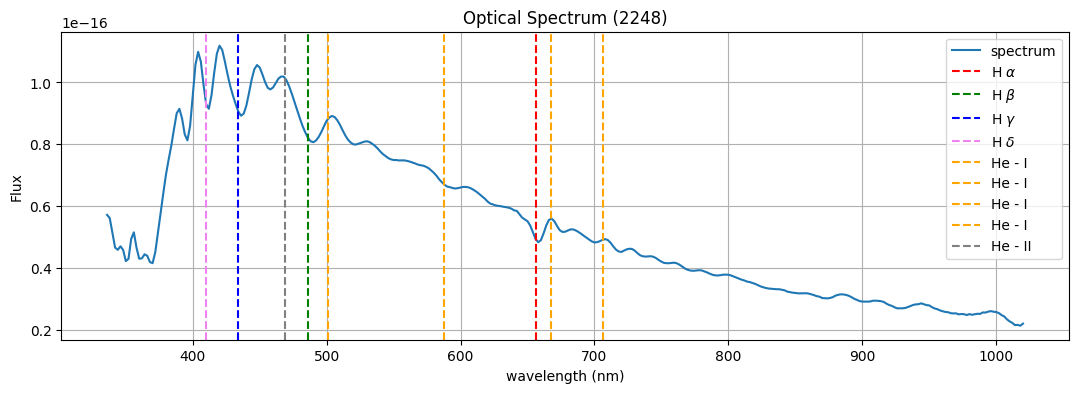

{'XP_SAMPLED-Gaia DR3 5684987011280279808.fits': [<Table length=343>
wavelength      flux        flux_error 
    nm      W / (nm m2)    W / (nm m2) 
 float64      float32        float32   
---------- -------------- -------------
     336.0  1.3455366e-16  3.535815e-17
     338.0  1.1514727e-16 2.6568882e-17
     340.0  9.8077614e-17 2.1704728e-17
     342.0  1.0179797e-16 1.8901089e-17
     344.0    1.12235e-16 1.7734312e-17
     346.0  1.0858725e-16  1.742772e-17
     348.0    9.85247e-17 1.8435345e-17
     350.0 1.01864023e-16 1.9470839e-17
     352.0  1.1883888e-16 2.1569388e-17
       ...            ...           ...
    1002.0   7.935387e-17 1.3144586e-17
    1004.0   7.497858e-17 1.2567797e-17
    1006.0   7.082204e-17 1.3642655e-17
    1008.0   6.519928e-17 1.6380178e-17
    1010.0   6.085368e-17 2.0401422e-17
    1012.0  5.7964926e-17 2.4480314e-17
    1014.0   5.599798e-17 2.7021969e-17
    1016.0  5.8192944e-17 2.8536153e-17
    1018.0  6.1598506e-17 2.7306863e-17
    1020.0 

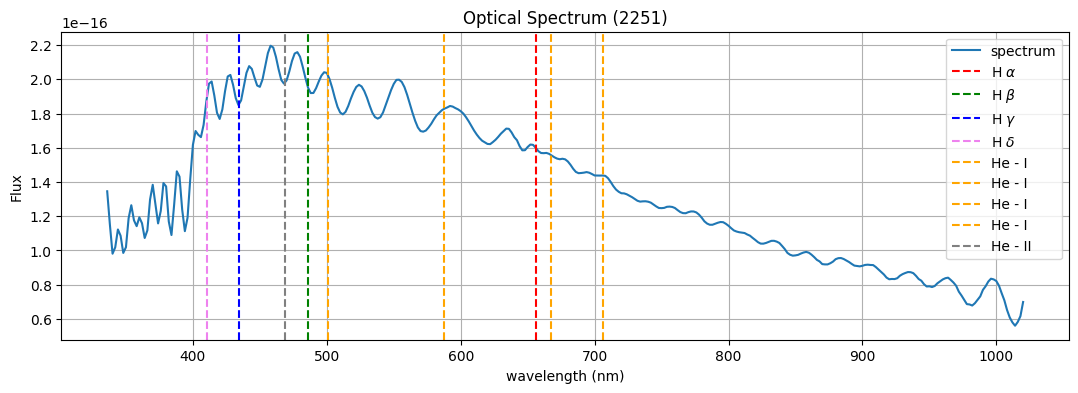

{}
Skipping source 5418746249213961472: no spectrum available
{}
Skipping source 5463274408550748160: no spectrum available
{}
Skipping source 3776795812613678976: no spectrum available
{}
Skipping source 6145666951501477376: no spectrum available
{}
Skipping source 6153373329716524800: no spectrum available
{'XP_SAMPLED-Gaia DR3 6185040879503491584.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 4.3588263e-16  6.675955e-17
     338.0  4.628983e-16  5.743439e-17
     340.0  4.724003e-16  5.334683e-17
     342.0  4.660708e-16 5.2542188e-17
     344.0  4.664535e-16 5.4210347e-17
     346.0  4.721204e-16  5.810029e-17
     348.0  4.692791e-16  6.424857e-17
     350.0  4.493865e-16 7.1355604e-17
     352.0  4.464626e-16  8.050619e-17
       ...           ...           ...
    1002.0   5.42359e-17  9.190902e-18
    1004.0  5.598745e-17  8.672604e-

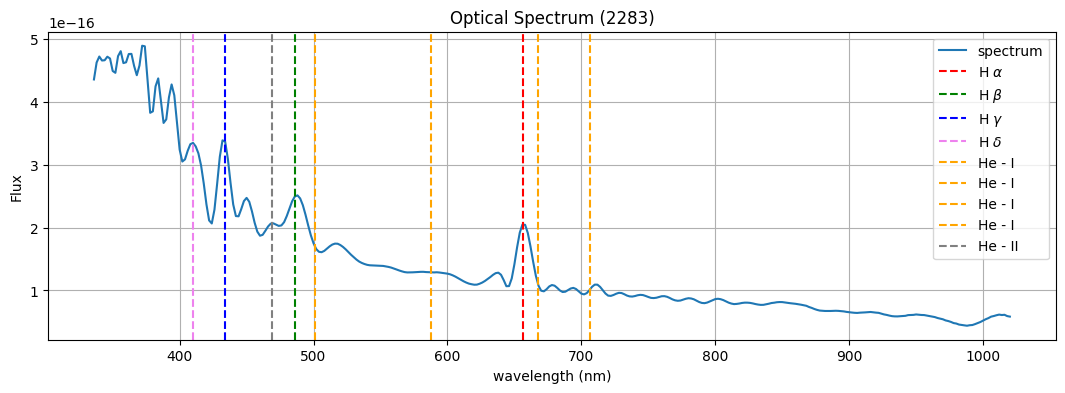

{}
Skipping source 3938156295111047680: no spectrum available
{}
Skipping source 5893562752211667328: no spectrum available
{}
Skipping source 6027098061438434944: no spectrum available
{}
Skipping source 5959894879940314880: no spectrum available
{}
Skipping source 6347097928386163072: no spectrum available
{}
Skipping source 6427690176495592960: no spectrum available
{'XP_SAMPLED-Gaia DR3 6679306059525350272.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 1.8798505e-17  3.917349e-18
     338.0 1.2843389e-17  2.811821e-18
     340.0 1.4233391e-17 2.2873467e-18
     342.0 1.3744749e-17 1.9563721e-18
     344.0 1.0041455e-17 1.8507188e-18
     346.0  8.320851e-18 1.8173623e-18
     348.0  1.167228e-17 1.9197015e-18
     350.0 1.6223763e-17  2.031556e-18
     352.0  1.709834e-17 2.2431327e-18
       ...           ...           ...
    1002.0 2.

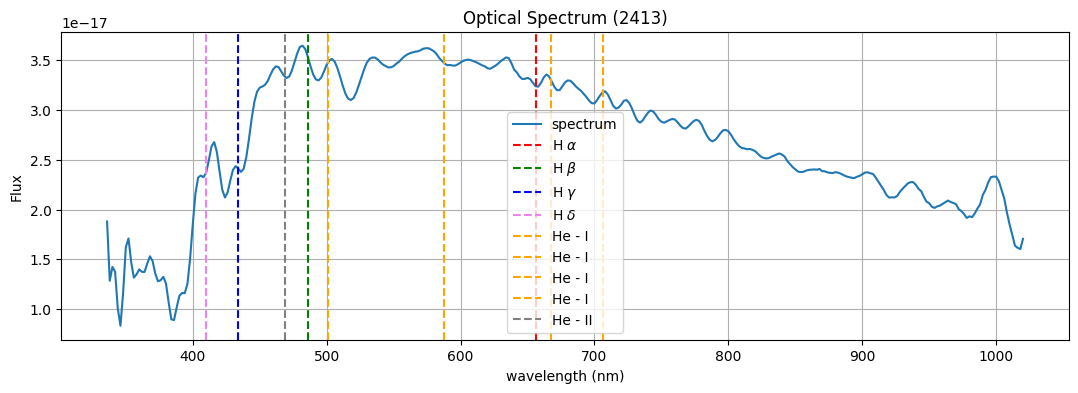

{'XP_SAMPLED-Gaia DR3 6676510138894499584.fits': [<Table length=343>
wavelength      flux        flux_error 
    nm      W / (nm m2)    W / (nm m2) 
 float64      float32        float32   
---------- -------------- -------------
     336.0  1.9737054e-17 4.3589478e-18
     338.0  1.8980112e-17 3.1712876e-18
     340.0  1.5764021e-17 2.5959608e-18
     342.0 1.30621844e-17 2.2042062e-18
     344.0  1.3585522e-17 2.1124973e-18
     346.0  1.5785179e-17 2.0144706e-18
     348.0  1.6480785e-17  2.192359e-18
     350.0  1.5023387e-17 2.2544239e-18
     352.0   1.461885e-17 2.5544417e-18
       ...            ...           ...
    1002.0   1.727625e-17 1.3897071e-18
    1004.0  1.7259764e-17 1.4135735e-18
    1006.0  1.7401897e-17 1.5524398e-18
    1008.0   1.716335e-17 1.7716643e-18
    1010.0   1.707219e-17 2.0754086e-18
    1012.0  1.7026107e-17 2.3881184e-18
    1014.0   1.668167e-17  2.591482e-18
    1016.0   1.684903e-17 2.7655725e-18
    1018.0  1.6596044e-17 2.7681494e-18
    1020.0 

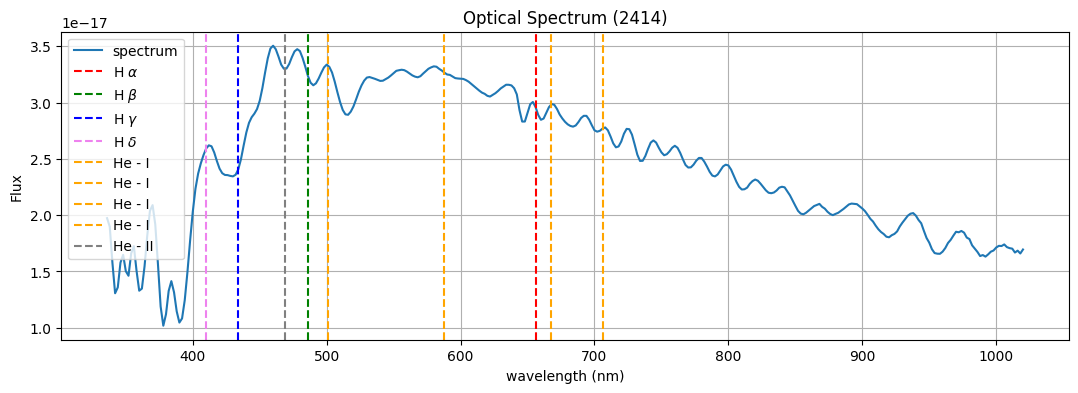

{}
Skipping source 5028756793461138688: no spectrum available
{'XP_SAMPLED-Gaia DR3 4954077173428971520.fits': [<Table length=343>
wavelength      flux       flux_error  
    nm      W / (nm m2)   W / (nm m2)  
 float64      float32       float32    
---------- ------------- --------------
     336.0  4.230107e-15   4.259697e-16
     338.0 4.0996246e-15  3.2245808e-16
     340.0 3.4256727e-15  2.7087457e-16
     342.0 3.0043524e-15  2.3838964e-16
     344.0 3.1467124e-15   2.299003e-16
     346.0 3.2459901e-15   2.281154e-16
     348.0 2.9501205e-15   2.451368e-16
     350.0  2.737993e-15  2.5991722e-16
     352.0 3.1980104e-15  2.9443831e-16
       ...           ...            ...
    1002.0 3.1789278e-15  1.0909745e-16
    1004.0  3.118436e-15 1.10208396e-16
    1006.0 3.0922312e-15  1.2287637e-16
    1008.0 3.0102632e-15  1.4408723e-16
    1010.0 2.9712984e-15  1.7251547e-16
    1012.0 2.9603503e-15  2.0067136e-16
    1014.0  2.918818e-15   2.178609e-16
    1016.0  2.986864e-15  2.3

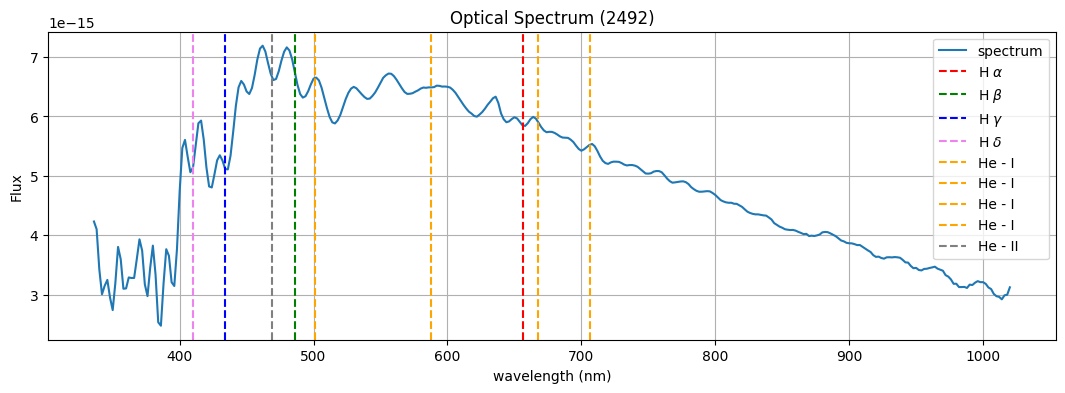

{}
Skipping source 4942033050042466432: no spectrum available
{'XP_SAMPLED-Gaia DR3 5126426235261870976.fits': [<Table length=343>
wavelength      flux        flux_error 
    nm      W / (nm m2)    W / (nm m2) 
 float64      float32        float32   
---------- -------------- -------------
     336.0  2.1088988e-17  3.012912e-18
     338.0  1.7833139e-17 2.2717757e-18
     340.0  1.5122756e-17  1.873371e-18
     342.0  1.4427896e-17 1.6874727e-18
     344.0  1.4586369e-17 1.5673203e-18
     346.0  1.4113864e-17 1.6086035e-18
     348.0 1.31229805e-17 1.6454492e-18
     350.0  1.2526385e-17 1.8050905e-18
     352.0  1.3429871e-17  1.966773e-18
       ...            ...           ...
    1002.0   2.963481e-17  1.302237e-18
    1004.0  2.8733803e-17  1.304541e-18
    1006.0  2.8180674e-17 1.4416794e-18
    1008.0  2.7226491e-17 1.6834642e-18
    1010.0  2.6850716e-17 2.0155641e-18
    1012.0  2.6995218e-17 2.3480057e-18
    1014.0   2.718381e-17 2.5522188e-18
    1016.0   2.875141e-17  2.

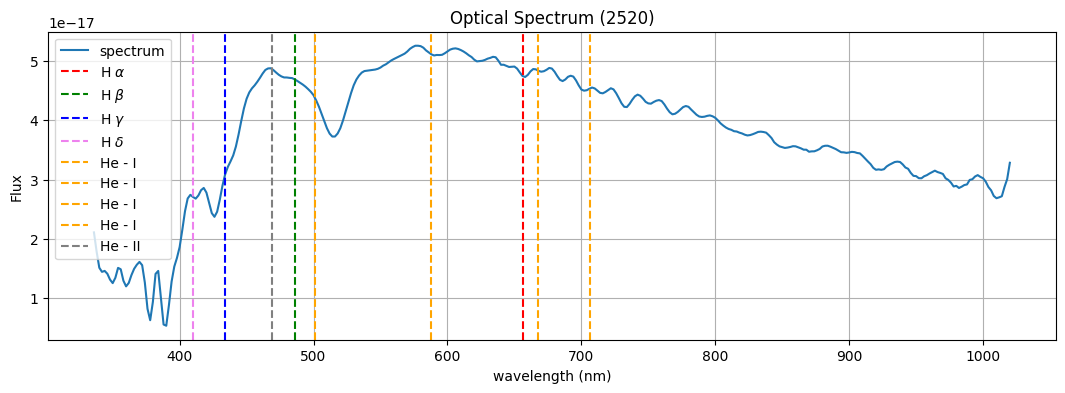

{'XP_SAMPLED-Gaia DR3 5091939988633728640.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 1.3911594e-15 1.8902813e-16
     338.0 1.4621556e-15 1.5906546e-16
     340.0  1.465404e-15 1.4762941e-16
     342.0 1.4705536e-15 1.4256614e-16
     344.0 1.4994314e-15 1.4445476e-16
     346.0 1.4929723e-15 1.5443357e-16
     348.0 1.4531708e-15  1.698557e-16
     350.0 1.4102264e-15 1.8623962e-16
     352.0  1.398774e-15  2.109522e-16
       ...           ...           ...
    1002.0 1.5435694e-16 1.7450394e-17
    1004.0 1.5094338e-16 1.6548683e-17
    1006.0   1.49415e-16 1.8011454e-17
    1008.0 1.4553005e-16  2.186923e-17
    1010.0 1.4414677e-16 2.7477254e-17
    1012.0 1.4459142e-16 3.3106822e-17
    1014.0 1.4396907e-16 3.6569463e-17
    1016.0 1.4908945e-16 3.8535962e-17
    1018.0 1.5138534e-16 3.6678906e-17
    1020.0  1.595113e-16  3.454217

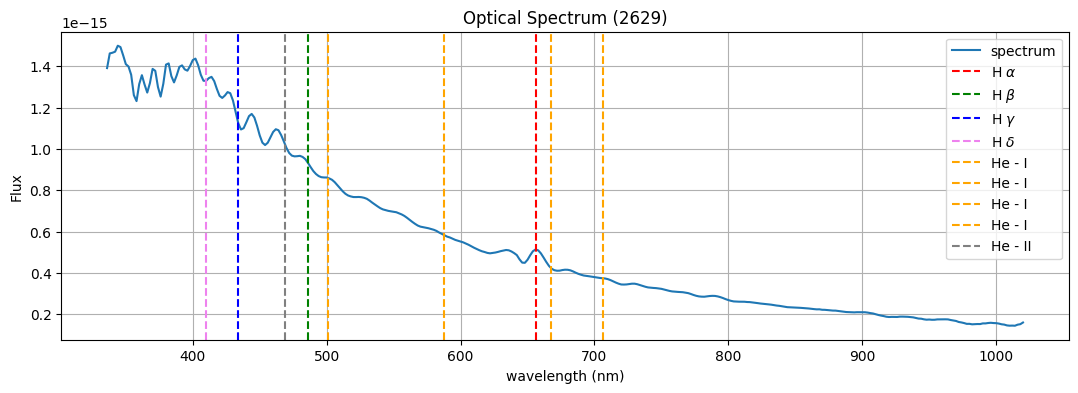

{}
Skipping source 3393671398233326976: no spectrum available
{}
Skipping source 4763542150616547712: no spectrum available
{}
Skipping source 3220279033010830720: no spectrum available
{}
Skipping source 4808308182426427648: no spectrum available
{'XP_SAMPLED-Gaia DR3 2964123717440395264.fits': [<Table length=343>
wavelength      flux       flux_error  
    nm      W / (nm m2)   W / (nm m2)  
 float64      float32       float32    
---------- ------------- --------------
     336.0 2.9603137e-16   2.271766e-17
     338.0 2.7542594e-16  1.6515771e-17
     340.0 2.5273901e-16  1.3089469e-17
     342.0 2.4460866e-16  1.1015658e-17
     344.0  2.434491e-16   9.962159e-18
     346.0 2.3204015e-16    9.49122e-18
     348.0 2.2079986e-16   9.656526e-18
     350.0 2.2807506e-16 1.00307346e-17
     352.0  2.540407e-16  1.0775307e-17
       ...           ...            ...
    1002.0 2.4032982e-16   7.577714e-18
    1004.0 2.3843932e-16   7.560364e-18
    1006.0  2.397151e-16   8.333483e-18
   

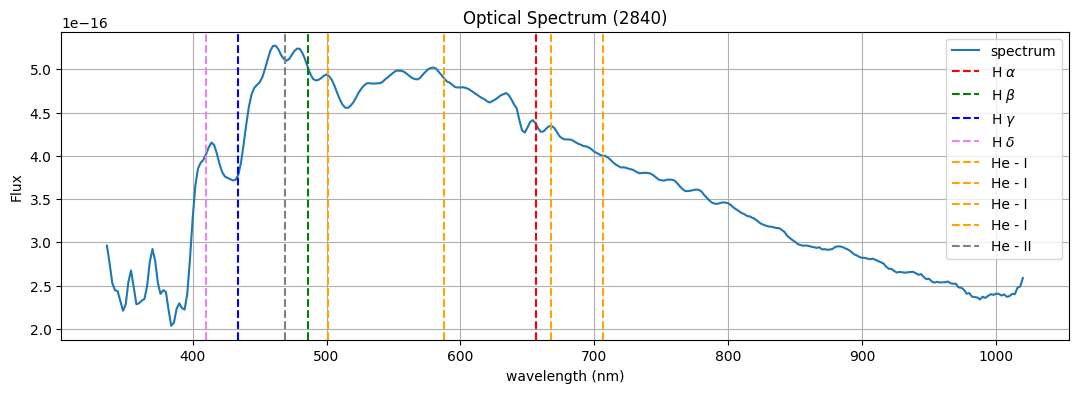

{'XP_SAMPLED-Gaia DR3 2893537785354369152.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 1.2583022e-17 3.4600125e-18
     338.0  9.856927e-18 2.5213083e-18
     340.0  8.679957e-18 2.0325989e-18
     342.0 9.1615795e-18 1.7537017e-18
     344.0  8.703804e-18 1.6224194e-18
     346.0 6.8114283e-18 1.6127929e-18
     348.0 6.3652867e-18 1.6808344e-18
     350.0  8.883661e-18  1.791955e-18
     352.0 1.1413893e-17 1.9769859e-18
       ...           ...           ...
    1002.0 2.3590253e-17  1.464181e-18
    1004.0 2.3074814e-17 1.4636729e-18
    1006.0 2.2684877e-17 1.6326237e-18
    1008.0 2.1812491e-17 1.9285956e-18
    1010.0 2.1252495e-17 2.3226812e-18
    1012.0 2.0975366e-17  2.706161e-18
    1014.0 2.0654731e-17  2.930015e-18
    1016.0 2.1362594e-17 3.0759474e-18
    1018.0 2.1944064e-17 2.9871068e-18
    1020.0 2.3695935e-17 2.9677206

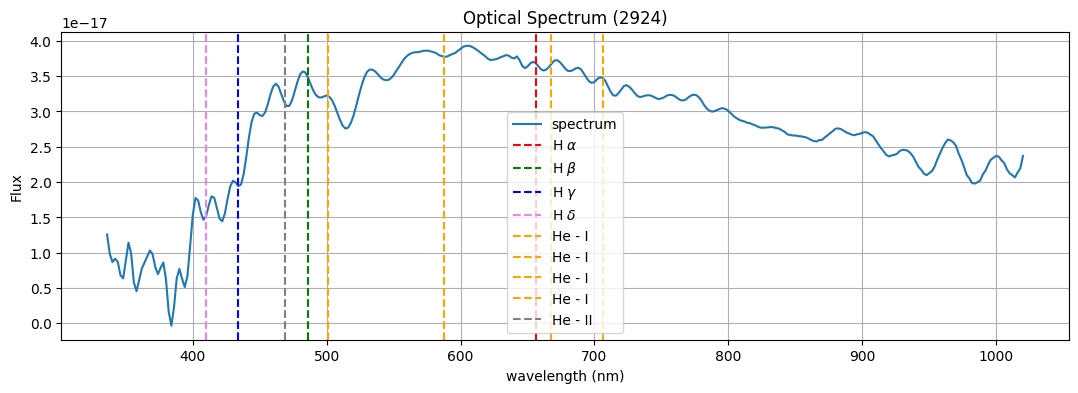

{}
Skipping source 5499638930276591232: no spectrum available
{'XP_SAMPLED-Gaia DR3 5483403442798078848.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 1.4902837e-17 2.9530584e-18
     338.0 1.0881491e-17 2.1570445e-18
     340.0 6.0779358e-18 1.7127039e-18
     342.0 4.0430115e-18 1.4547316e-18
     344.0 5.2204737e-18 1.3583391e-18
     346.0  7.266041e-18 1.3630327e-18
     348.0 7.5013494e-18    1.4091e-18
     350.0 5.8142136e-18 1.4836431e-18
     352.0 5.3988966e-18 1.6649596e-18
       ...           ...           ...
    1002.0 2.1230469e-17  1.474786e-18
    1004.0 2.1079204e-17 1.4965881e-18
    1006.0 2.1194531e-17 1.6793825e-18
    1008.0 2.0964823e-17 1.9689434e-18
    1010.0 2.1068785e-17  2.341656e-18
    1012.0 2.1402043e-17 2.6967465e-18
    1014.0  2.151776e-17 2.8936933e-18
    1016.0 2.2413625e-17 3.0207565e-18
    1018.0 

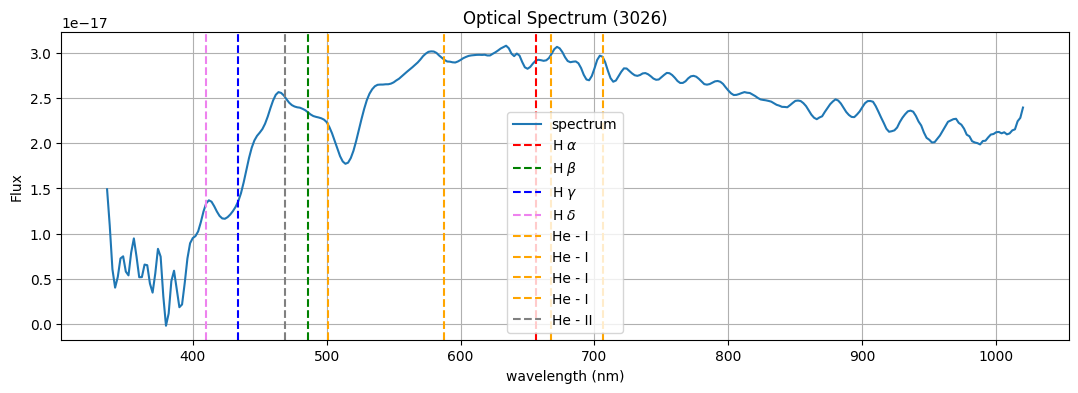

{}
Skipping source 5560928461485813504: no spectrum available
{}
Skipping source 5488313999169660928: no spectrum available
{}
Skipping source 5725555554378081024: no spectrum available
{}
Skipping source 5517171678268366848: no spectrum available
{'XP_SAMPLED-Gaia DR3 683908812437792000.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 2.6049852e-16 2.4524068e-16
     338.0 2.3442643e-16 1.9884038e-16
     340.0  2.317491e-16 1.7601353e-16
     342.0 2.3993675e-16 1.6509262e-16
     344.0 2.4500523e-16 1.6418818e-16
     346.0 2.4244375e-16 1.7266179e-16
     348.0 2.3502777e-16 1.8440322e-16
     350.0 2.2092365e-16 2.0305472e-16
     352.0 2.1721065e-16 2.2761737e-16
       ...           ...           ...
    1002.0 4.2955936e-17  6.797134e-17
    1004.0 4.0366827e-17  6.643789e-17
    1006.0  3.757124e-17    7.1238e-17
    1008.0  3.381173e

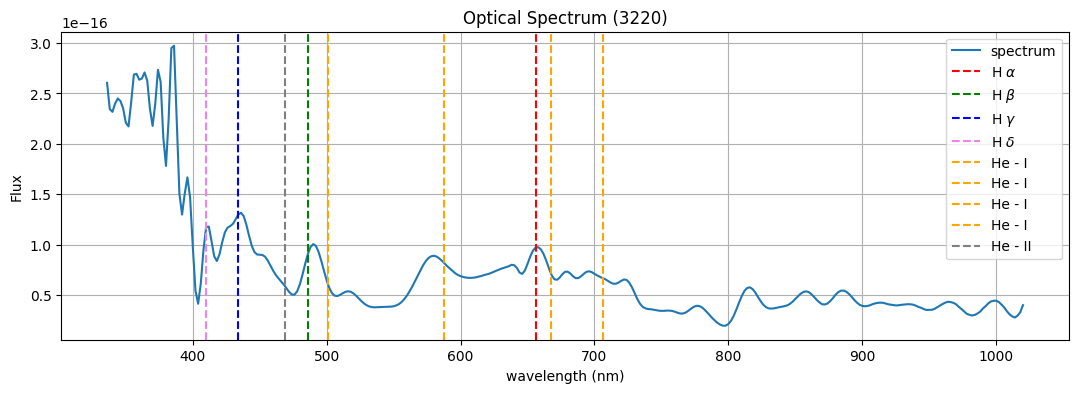

{'XP_SAMPLED-Gaia DR3 5529310351063110144.fits': [<Table length=343>
wavelength      flux        flux_error 
    nm      W / (nm m2)    W / (nm m2) 
 float64      float32        float32   
---------- -------------- -------------
     336.0  1.2200104e-14  2.339953e-15
     338.0   1.150602e-14 1.9471003e-15
     340.0   1.078592e-14 1.7115482e-15
     342.0  1.0037594e-14 1.6342081e-15
     344.0   9.790367e-15 1.6370227e-15
     346.0 1.01631435e-14 1.7508715e-15
     348.0  1.0588932e-14  1.921754e-15
     350.0  1.0188957e-14 2.1928876e-15
     352.0  9.6156595e-15 2.4829854e-15
       ...            ...           ...
    1002.0   2.664052e-15   9.57617e-16
    1004.0  2.6543872e-15   9.85473e-16
    1006.0  2.6911645e-15 1.0773146e-15
    1008.0  2.7001515e-15 1.2067905e-15
    1010.0  2.7708737e-15 1.3858912e-15
    1012.0  2.8936824e-15 1.5740137e-15
    1014.0  3.0090488e-15 1.7011404e-15
    1016.0  3.2565943e-15 1.8251353e-15
    1018.0  3.4496706e-15 1.8528016e-15
    1020.0 

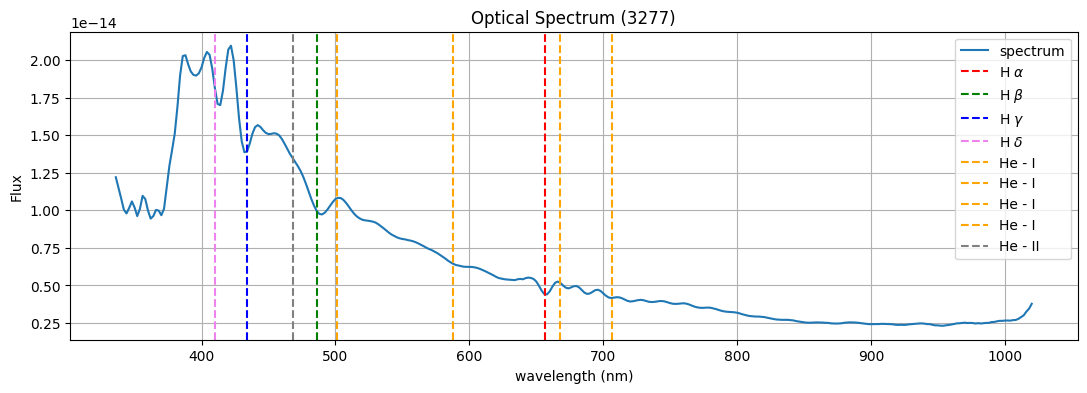

{'XP_SAMPLED-Gaia DR3 3769067109159364608.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 4.7010278e-15 1.0388348e-15
     338.0 4.3333795e-15  9.104092e-16
     340.0 4.1943187e-15  8.448428e-16
     342.0 4.1302665e-15 8.2504196e-16
     344.0 4.1295948e-15 8.4876846e-16
     346.0 4.1101613e-15  8.909435e-16
     348.0 4.0410405e-15  9.786856e-16
     350.0  3.921711e-15 1.0582474e-15
     352.0  3.960206e-15 1.1925862e-15
       ...           ...           ...
    1002.0 4.1632358e-16 5.6129154e-17
    1004.0 3.8929647e-16 5.2616436e-17
    1006.0 3.6681204e-16  5.639235e-17
    1008.0 3.4086448e-16  6.860809e-17
    1010.0 3.2601274e-16   8.74042e-17
    1012.0 3.2307875e-16 1.0694966e-16
    1014.0 3.2774278e-16 1.1985791e-16
    1016.0 3.5675344e-16 1.2805451e-16
    1018.0 3.8971832e-16 1.2350376e-16
    1020.0 4.4641966e-16 1.1743191

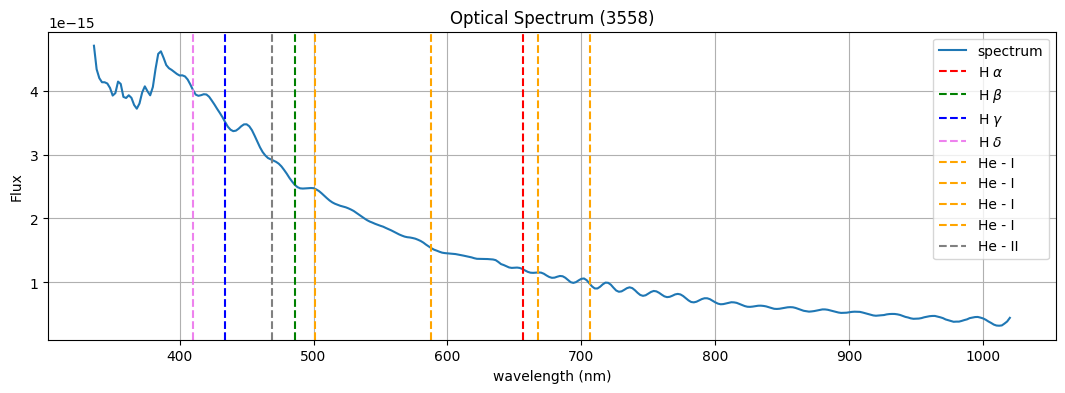

{}
Skipping source 5440739539784391040: no spectrum available
{}
Skipping source 3757331059483622784: no spectrum available
{'XP_SAMPLED-Gaia DR3 5359544145138189184.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 4.3665697e-17  4.888446e-18
     338.0 3.6827335e-17 3.6144765e-18
     340.0 3.3993384e-17  2.951207e-18
     342.0  3.521006e-17 2.5578383e-18
     344.0 3.8735296e-17 2.3970733e-18
     346.0 3.9120273e-17  2.360866e-18
     348.0 3.4160713e-17 2.4562158e-18
     350.0 2.9157306e-17 2.6020259e-18
     352.0 3.2650953e-17 2.8353266e-18
       ...           ...           ...
    1002.0 4.6262405e-17  1.546295e-18
    1004.0 4.6229477e-17 1.5369593e-18
    1006.0 4.6877278e-17 1.6902316e-18
    1008.0 4.6734947e-17  1.974508e-18
    1010.0  4.716471e-17 2.3702856e-18
    1012.0 4.7793927e-17 2.7671396e-18
    1014.0  4.750616e-17 3.

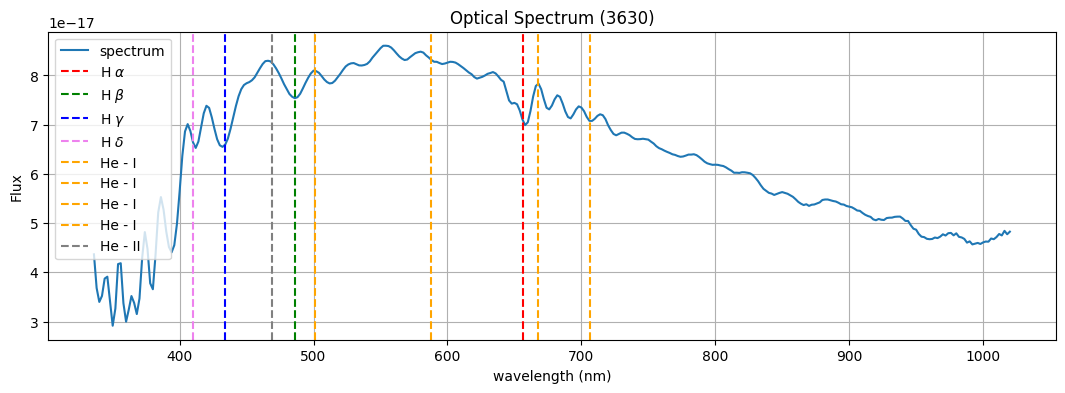

{}
Skipping source 3503987633230546688: no spectrum available
{'XP_SAMPLED-Gaia DR3 6109610082576472704.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0 3.4848762e-17  6.835632e-18
     338.0 2.4664021e-17 4.7490035e-18
     340.0  1.944466e-17 3.8522785e-18
     342.0 1.9226453e-17  3.315364e-18
     344.0 2.0184982e-17  3.130718e-18
     346.0 2.1376579e-17 3.0398025e-18
     348.0 2.4263853e-17 3.2656973e-18
     350.0 2.7258554e-17  3.427295e-18
     352.0 2.7915245e-17 3.7885203e-18
       ...           ...           ...
    1002.0  2.657734e-17 5.7313657e-18
    1004.0  2.648833e-17 6.0495453e-18
    1006.0 2.6457688e-17  6.750706e-18
    1008.0 2.5711622e-17  7.610489e-18
    1010.0 2.5119502e-17  8.695041e-18
    1012.0 2.4609761e-17  9.787169e-18
    1014.0 2.3801115e-17 1.0512083e-17
    1016.0 2.3981958e-17 1.1298752e-17
    1018.0 

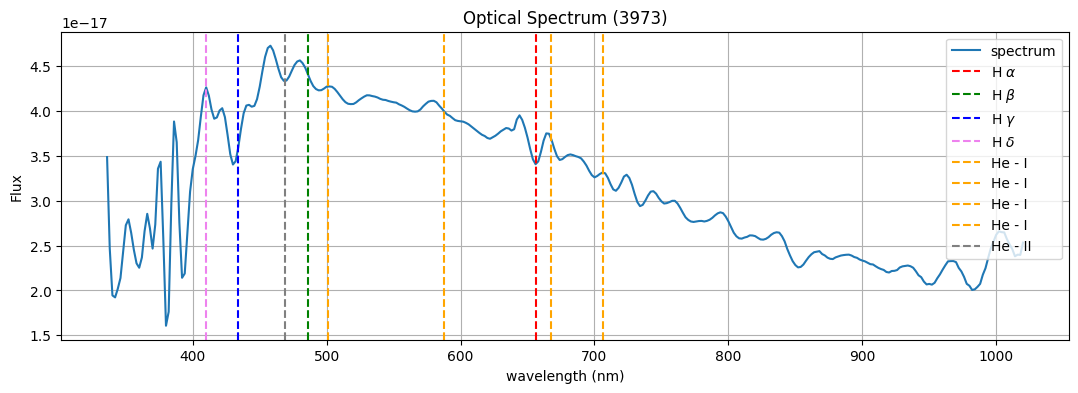

{}
Skipping source 6206305430089392896: no spectrum available
{'XP_SAMPLED-Gaia DR3 5817673772417657728.fits': [<Table length=343>
wavelength      flux       flux_error  
    nm      W / (nm m2)   W / (nm m2)  
 float64      float32       float32    
---------- ------------- --------------
     336.0  7.272907e-17   3.796626e-17
     338.0  5.723485e-17  2.6831865e-17
     340.0  5.377593e-17  2.2026691e-17
     342.0 5.0485013e-17  1.8378802e-17
     344.0 4.5346762e-17  1.7395557e-17
     346.0  4.155168e-17  1.6732593e-17
     348.0 4.2437853e-17  1.7431394e-17
     350.0  4.737491e-17  1.8375126e-17
     352.0 5.3600298e-17  2.0198583e-17
       ...           ...            ...
    1002.0 3.8210804e-17  4.1886726e-18
    1004.0 3.7978966e-17   4.008271e-18
    1006.0 3.7967024e-17  4.4748465e-18
    1008.0 3.7127125e-17  5.5562123e-18
    1010.0 3.6778134e-17   7.052532e-18
    1012.0 3.6894588e-17   8.533423e-18
    1014.0  3.694024e-17   9.461162e-18
    1016.0 3.8913402e-17 1.00

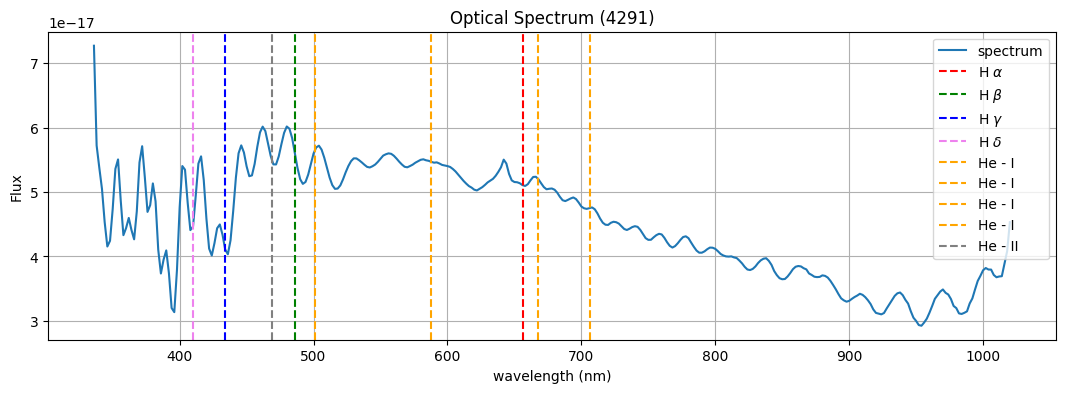

{}
Skipping source 5948650896092600064: no spectrum available
{'XP_SAMPLED-Gaia DR3 6630629472878877056.fits': [<Table length=343>
wavelength      flux       flux_error 
    nm      W / (nm m2)   W / (nm m2) 
 float64      float32       float32   
---------- ------------- -------------
     336.0  9.771026e-16  9.621022e-17
     338.0 1.0398713e-15  8.419632e-17
     340.0 1.0678382e-15  7.946549e-17
     342.0 1.0523814e-15  7.910599e-17
     344.0 1.0274409e-15 8.2500956e-17
     346.0 1.0109808e-15 8.8832865e-17
     348.0 1.0082215e-15 9.8743435e-17
     350.0  9.880199e-16 1.0998154e-16
     352.0  9.682667e-16 1.2367949e-16
       ...           ...           ...
    1002.0  9.144848e-17   7.94667e-18
    1004.0  8.925766e-17  7.631765e-18
    1006.0 8.7507966e-17  8.413392e-18
    1008.0 8.3748146e-17 1.0221371e-17
    1010.0  8.094234e-17 1.2759872e-17
    1012.0  7.888708e-17 1.5269306e-17
    1014.0 7.6337236e-17 1.6778656e-17
    1016.0  7.729293e-17 1.7633393e-17
    1018.0 

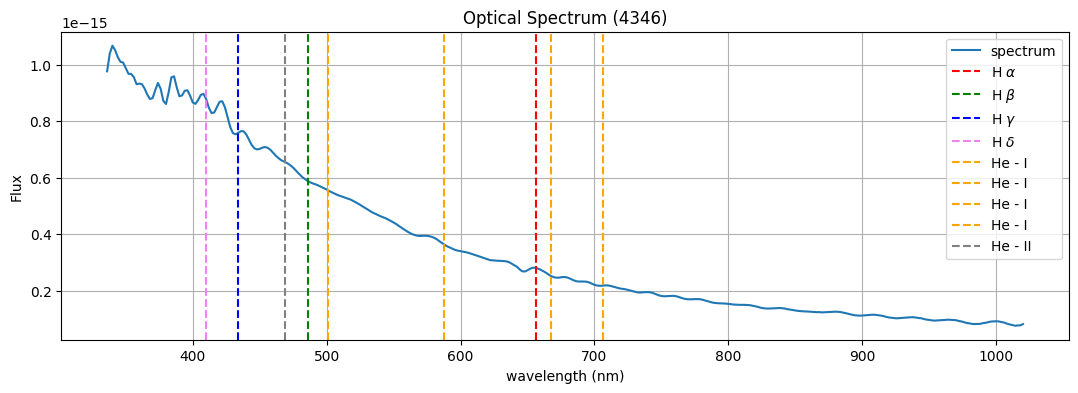

{}
Skipping source 2307289214897332480: no spectrum available


In [8]:
# This gets the datalink table with URLs for all available products (including RVS spectrum)
for idx in source_id:
    try:
        op_spec = Gaia.load_data(ids=[int(idx[0])], data_release="Gaia DR3",
                                retrieval_type="XP_SAMPLED",format="fits")
        print(op_spec)
        table = list(op_spec.values())[0][0]

        wave = np.array(table['wavelength'])
        flux = np.array(table['flux'])

        plot.figure(figsize=(13, 4))
        plot.plot(wave,flux,label ="spectrum")
        plot.xlabel("wavelength (nm)")
        plot.ylabel("Flux")
        plot.axvline(x = 656.28,color = "red", linestyle='--', label = "H $\\alpha $")
        plot.axvline(x = 486.1, color = "green", linestyle='--', label = "H $\\beta $")
        plot.axvline(x = 434.1, color = "blue", linestyle='--', label = "H $\\gamma $")
        plot.axvline(x = 410.2, color = "violet", linestyle='--', label = "H $\\delta $")
        plot.axvline(x = 706.5, color = "orange", linestyle='--', label = "He - I ")
        plot.axvline(x = 667.8, color = "orange", linestyle='--', label = "He - I ")
        plot.axvline(x = 587.8, color = "orange", linestyle='--', label = "He - I ")
        plot.axvline(x = 501.2, color = "orange", linestyle='--', label = "He - I ")
        plot.axvline(x = 468.6, color = "grey", linestyle='--', label = "He - II ")
        plot.title(f"Optical Spectrum ({idx[1]})")
        plot.grid()
        plot.legend()
        
        plot.show()
    except IndexError:
        print(f"Skipping source {idx[0]}: no spectrum available")
        continue
    except Exception as e:
        print(f"Skipping source {idx[0]} due to error: {e}")
        continue

In [7]:
#SDSS spectra
# save as fetch_sdss_spectrum_single.py
import astroquery
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
from astropy.io import fits
import os

# --- USER INPUT: put your RA and DEC here (degrees) ---
RA = 43.88861195		
DEC = -47.84515474

# search radius (arcseconds)
radius = 10.0 * u.arcsec

# output folder
outdir = "sdss_spectra"
os.makedirs(outdir, exist_ok=True)

# build SkyCoord and query for objects with spectra
c = coords.SkyCoord(RA, DEC, unit=(u.deg, u.deg), frame='icrs')
print(f"Querying SDSS within {radius.to(u.arcsec)} of {c.to_string('hmsdms')} ...")
tbl = SDSS.query_region(c, spectro=True, radius=radius)

if tbl is None or len(tbl) == 0:
    print("No SDSS spectra found within radius. Try increasing `radius` or check coordinates.")
else:
    print(f"Found {len(tbl)} spectral match(es). Downloading...")

    for i, row in enumerate(tbl):
        # common identifiers in the query table: plate, mjd, fiberID
        plate = int(row['plate'])
        mjd = int(row['mjd'])
        fiber = int(row['fiberID']) if 'fiberID' in row.colnames else int(row['fiberid'])
        filename = f"spec-PL{plate}-MJD{mjd}-F{fiber}.fits"
        outpath = os.path.join(outdir, filename)

        # get_spectra can accept plate/mjd/fiber
        try:
            sp = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber)
            # get_spectra returns a list of HDULists or None
            if sp:
                # write first spectrum to file
                sp[0].writeto(outpath, overwrite=True)
                print(f"Saved: {outpath}")
            else:
                print(f"SDSS.get_spectra returned nothing for plate={plate}, mjd={mjd}, fiber={fiber}")
        except Exception as e:
            print("Error downloading spectrum:", e)

Querying SDSS within 10.0 arcsec of 02h55m33.266868s -47d50m42.557064s ...
No SDSS spectra found within radius. Try increasing `radius` or check coordinates.


In [11]:
# ==============================================================
# SDSS / BOSS / eBOSS Spectrum Downloader & Plotter by RA/DEC
# Author: ChatGPT (for Abhishek Kulkarni)
# ==============================================================

from astroquery.sdss import SDSS
from astropy import coordinates as coords
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning, append=True)

# --------------------------------------------------------------
# 1️⃣  User input: RA and Dec in degrees
# --------------------------------------------------------------
ra = 43.88861195		
dec = -47.84515474

# Create SkyCoord object
pos = coords.SkyCoord(ra, dec, unit='deg', frame='icrs')

# --------------------------------------------------------------
# 2️⃣  Query SDSS for available spectra near the coordinates
# --------------------------------------------------------------
print("\nSearching SDSS DR16 (BOSS/eBOSS)... please wait...\n")
specs = SDSS.get_spectra(coordinates=pos, radius= 3*u.arcmin , data_release=16)

if specs is None or len(specs) == 0:
    print("❌ No SDSS/BOSS/eBOSS spectrum found near these coordinates.")
    print("Try increasing the search radius or check RA/Dec accuracy.")
else:
    print(f"✅ Found {len(specs)} spectrum(s). Using the first one.\n")

    # ----------------------------------------------------------
    # 3️⃣  Extract data from the first FITS spectrum
    # ----------------------------------------------------------
    spec = specs[0]
    data = spec[1].data
    hdr = spec[0].header

    # Convert log10(lambda) → λ (Å)
    wavelength = 10 ** data['loglam']
    flux = data['flux']
    ivar = data['ivar']

    # Mask bad pixels
    mask = ivar > 0
    wavelength = wavelength[mask]
    flux = flux[mask]

    # ----------------------------------------------------------
    # 4️⃣  Plot the spectrum
    # ----------------------------------------------------------
    plt.figure(figsize=(10, 5))
    plt.plot(wavelength, flux, color='black', lw=0.8)
    plt.xlabel("Wavelength (Å)")
    plt.ylabel("Flux (1e−17 erg/s/cm²/Å)")
    plt.title(f"SDSS/BOSS/eBOSS Spectrum\nRA={ra:.5f}, Dec={dec:.5f}")
    plt.xlim(3600, 9200)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ----------------------------------------------------------
    # 5️⃣  Optional: save the spectrum to FITS file
    # ----------------------------------------------------------
    outname = f"SDSS_spectrum_{ra:.5f}_{dec:.5f}.fits"
    spec.writeto(outname, overwrite=True)
    print(f"\n💾 Spectrum saved as: {outname}")



Searching SDSS DR16 (BOSS/eBOSS)... please wait...

❌ No SDSS/BOSS/eBOSS spectrum found near these coordinates.
Try increasing the search radius or check RA/Dec accuracy.
